# Chapter 4. Tides, Rotation and Shape #

## Action by Sofía Arboleda-Bolívar ##

This notebook is made with the intention of giving some theoretical and practical tools for the fourth chapter of Murray & Dermott Astrodynamics book.

In [24]:
!pip install --upgrade -q pip
!pip install -q pymcel
!pip install -q celluloid

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
import astropy 
from astropy import constants as const
from astropy import units as u


### 4.1 Tidal Bulge 

Derivation of potentials from interaction between a planet and a satellite

Given the potential on a point P on the surface of a planet due to a satellite:

$V = -G \frac{m_s}{\triangle}$

With $\triangle = a\left[ 1 - 2\left(\frac{R_p}{a}\right)cos(\Psi) + \left(\frac{R_p}{a}\right)^2\right]^{1/2}$

And since $R_p/a << 1$, $\triangle$ can be expaned binomially. However, we can consider the polynomial expansion in taylor series using sympy:

In [2]:
#Define x as the Rp/a ratio to expand around it
x, psi = sym.symbols('x, Psi') 

# Define the expression (here we use a negative exponential 
    #due to the position of the polynomial in the potential formula).

expr = (1-2*x*sym.cos(psi)+ x**2 )**(-1/2)

#Perform of Taylor series expansion
taylor_series = sym.series(expr, x, n=3)

display(Markdown('The corresponding expansion is'))
display(taylor_series)


The corresponding expansion is

1 + 1.0*x*cos(Psi) + x**2*(1.5*cos(Psi)**2 - 0.5) + O(x**3)

In [4]:
serie_valor=serie_truncada.subs(x,1)

In [5]:
sym.lambdify((psi, x), serie_truncada,'numpy') #Lamdificar con numpy

<function _lambdifygenerated(Psi, x)>

Now you can see that the potential is given by:
$V=-\mathcal{G} \frac{m_{\mathrm{s}}}{a}\left[1+\left(\frac{R_{\mathrm{p}}}{a}\right) \cos \psi+\left(\frac{R_{\mathrm{p}}}{a}\right)^2 \frac{1}{2}\left(3 \cos ^2 \psi-1\right)+\cdots\right]$

Since the potential can be divided in those first three terms as $V_1, V_2, V_3$, we can look at the contribution of each one of them in the total potential. For that, let's use Earth-Moon system data:


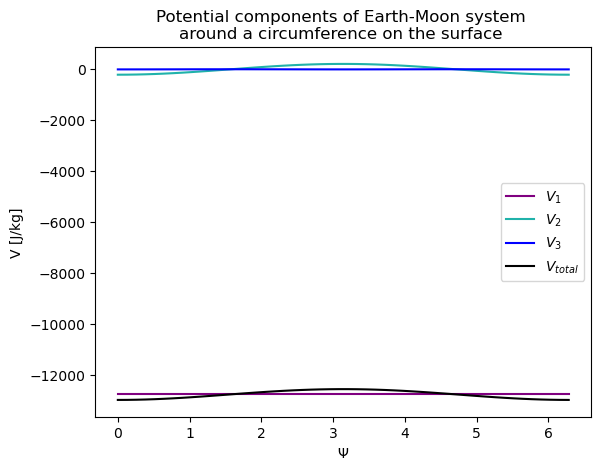

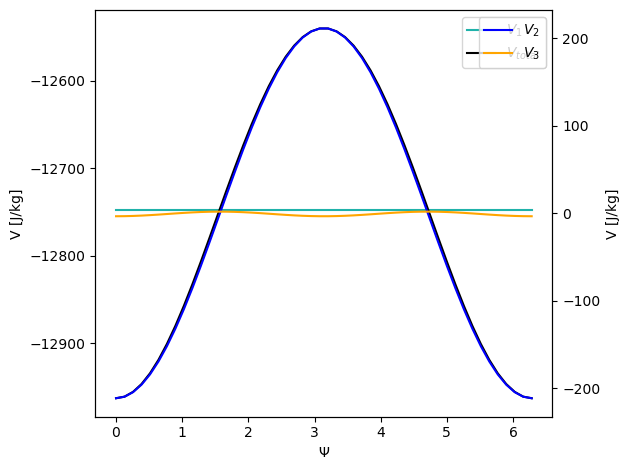

In [25]:
# Parameters
R_t = float(const.R_earth.value)
G = float(const.G.value)
a_em = 384400e3 # Mean Earth-Moon distance
m_s = 7.342e22 # Moon mass

x_s = np.linspace(0, 2*np.pi)

P_2 = lambda psi: (1/2)*(3*np.cos(psi)**2 - 1)
V1 = np.array([-G*(m_s/a_em) for i in range(len(x_s))]) #Array with constant value
V2 = lambda psi: V1*(R_t/a_em)*np.cos(psi)
V3 = lambda psi: V1*(R_t/a_em)**2*P_2(psi)


#Triangle function 
serie_truncada = taylor_series.removeO() #Remove the higher order factor from the taylor series
V = sym.lambdify((psi, x), serie_truncada,'numpy') #Lambdification of function in terms of psi and x


# Total potential
V_tot = V1[0]*V(x_s, R_t/a_em)

plt.plot(x_s, V1, c='purple', label='$V_{1}$')
plt.plot(x_s, V2(x_s), c='lightseagreen', label='$V_{2}$')
plt.plot(x_s, V3(x_s), c='blue', label='$V_{3}$')
plt.plot(x_s, V_tot, c='black', label='$V_{total}$' )
plt.title('Potential components of Earth-Moon system \naround a circumference on the surface ')
plt.xlabel('$\Psi$')
plt.ylabel('V [J/kg]')
plt.legend()


fig, ax1 = plt.subplots()

ax1.set_xlabel('$\Psi$')
ax1.set_ylabel('V [J/kg]')
ax1.plot(x_s, V1, color='lightseagreen', label='$V_{1}$')
ax1.plot(x_s, V_tot, color='black', label='$V_{total}$')
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('V [J/kg]')  # we already handled the x-label with ax1
ax2.plot(x_s, V2(x_s), c='blue', label='$V_{2}$')
ax2.plot(x_s, V3(x_s), c='orange', label='$V_{3}$')
ax2.tick_params(axis='y')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

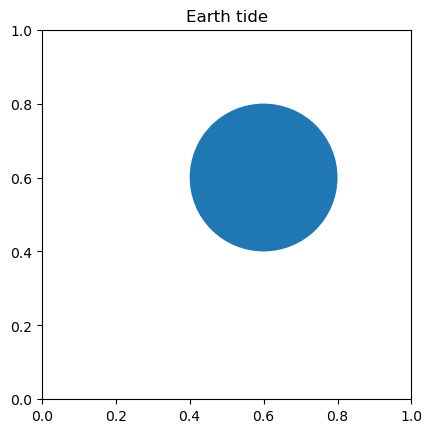

In [32]:
figure, axes = plt.subplots()
Drawing_colored_circle = plt.Circle(( 0.6 , 0.6 ), 0.2)
 
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
plt.title( 'Earth tide' )
plt.show()

*IDEAS:* 
$\rightarrow$ Look at the tide raising part of the potential and compare with real data meassured ($V_3 = -\zeta g P_2(cos(\Psi))$).

$\rightarrow$ Show the two high tides and two low tides (maximum and minimum of the function) on earth during a day. (Maybe with a dynamical plot on a sphere showing the four tides).

$\rightarrow$ Use data of colatitudes and longitudes of the Moon (θM , φM ) and a point
P (θP,φP) on the surface of the Earth (look at the behavoir of the variables).

### 4.2 Potential Theory 

*IDEAS:* 
$\rightarrow$ ¿What does the Legendre polynomials and Spherical surface harmonics are? Show a mathematical tool and/or graphics to understand the math behind the theory presented in this section. (Steps to derive the external and internal potential already knowing the math behind).

$\rightarrow$ ¿What is an equipotential surface and how does the text uses it? (Graphics)

### 4.3 Tidal deformation

*IDEAS:* 
$\rightarrow$ Derive the proof of Chree (1896a): the yielding of the core under the force resulting from the core deforming potential is the same as that which would be produced by an outward normal force per unit area of amount ρZ A2P2(cosψ) acting at the mean core boundary, r = A.

$\rightarrow$ show that the radial displacement of the solid core produced by this deforming pressure is $\Delta R(\Psi)...$ (Love (1944)).

$\rightarrow$ Study F (measure of the effect of the ocean on the amplitude of the core tide), and H (measure of the effect of the internal structure on the external shape of the planet) in different planets with their satellites. Look at the difference when the case is for a satellite with spin rate equal to or synchronous with its orbital mean motion (hydrostatic value of H).

$\rightarrow$ Compare the amplitude of ocean tide in different cases (for the uniform ocean model) σ = ρ, with the equilibrium tide and the amplitude of the solid body tide for a planet with and without ocean.

$\rightarrow$ Calculate the height of the surface above the ocean floor for a real ocean basin and look at the variability with the general assumption for the whole earth (importance of currents on determining the shape of Earth's oceans).


### 4.5 Rotational Deformation
*IDEAS:* 
$\rightarrow$ Construct the oblate spheroid (shape of the distorted planet) using Legendre polynomial of degree 2 where the angle ψ is measured from the axis of symmetry.

$\rightarrow$ Compare the flatness of some planets calculated by the difference between radius and by the realtion with the rotational velocity. (without considering the rotational distortion).

$\rightarrow$ Look at the upper limit on the rotational velocity of the solar system planets and their corresponding rotation period (animation with the spheres and different velocities?).



### 4.6 The Darwin-Radau Relation

$\rightarrow$ Moment of inertia factor (C-) graphic for different planetary systems (if possible). Look at the Darwin–Radau model, and other general core–mantle models.

### 4.7 Shapes and Internal Structures of Satellites

$\rightarrow$ Interactive equipotential surfaces arising from rotational deformation and from tidal deformation.

$\rightarrow$ Which studies have been done in the determination of internal structures using the shape technique described in the text (example of Mimas and Jovian system)? Is it really convenient or other thechniques are being applied nowadays to determine better the shape of planets and satellites?

### 4.8 The Roche Zone 

### 4.9 Tidal Torques

### 4.10 Satellite Tides